In [1]:
seed=1899

In [2]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [3]:
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['PYTHONHASHSEED']=str(seed)

import random
import tensorflow as tf


tf.random.set_seed(seed)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print("Name:", gpu.name, "  Type:", gpu.device_type)

    except RuntimeError as e:
        print(e)

Name: /physical_device:GPU:0   Type: GPU


In [4]:


from keras.models import Sequential, load_model, save_model
from keras.layers import Dense,Input
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras import backend as K
import glob
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error  
import keras
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# from sklearn.metrics import r2_score
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
np.random.seed(seed)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from keras.utils import to_categorical
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=15,5

import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
from sklearn.cluster import KMeans
#PCA
from sklearn.manifold import TSNE

In [5]:
df = pd.read_csv('data.csv', header=0, index_col=None)

In [6]:
df

,Temp,RhPer,Thickness,SoilType,Sand,Silt,Clay,LL,PL,SL,...,Womc,Gamadmax,Phi,AEV,Wr,Mineral1,Mineral2,Mineral3,Er,Er_Paper
0,30,40,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,503,793.110224
1,30,50,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,471,717.338338
2,30,60,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,452,660.834156
3,30,70,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,416,616.547337
4,30,80,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,324,580.590667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,50,50,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,934,703.219730
356,50,60,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,867,639.612289
357,50,70,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,758,590.343069
358,50,80,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,733,550.742582


In [7]:
idx=['Temp','RhPer','Thickness','SoilType','Sand','Silt','Clay','LL','PL','SL','G','Womc','Gamadmax','Phi','AEV','Wr','Mineral1','Mineral2','Mineral3','Er','Er_Paper']


In [8]:
newdf=df[idx]
data=newdf.values[:,:-2]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
label=newdf.values[:,-2]
np.random.seed(seed)
Per=np.random.permutation(len(data))
data=data[Per]
label=label[Per]


In [9]:
data.shape

(360, 19)

In [10]:
data[0]

array([0.        , 0.4       , 0.        , 0.25      , 0.33333333,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.28979592,
       1.        , 0.75      , 0.        , 0.        ])

In [11]:
label[:5]

array([304., 799., 319., 686., 377.])

[0]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


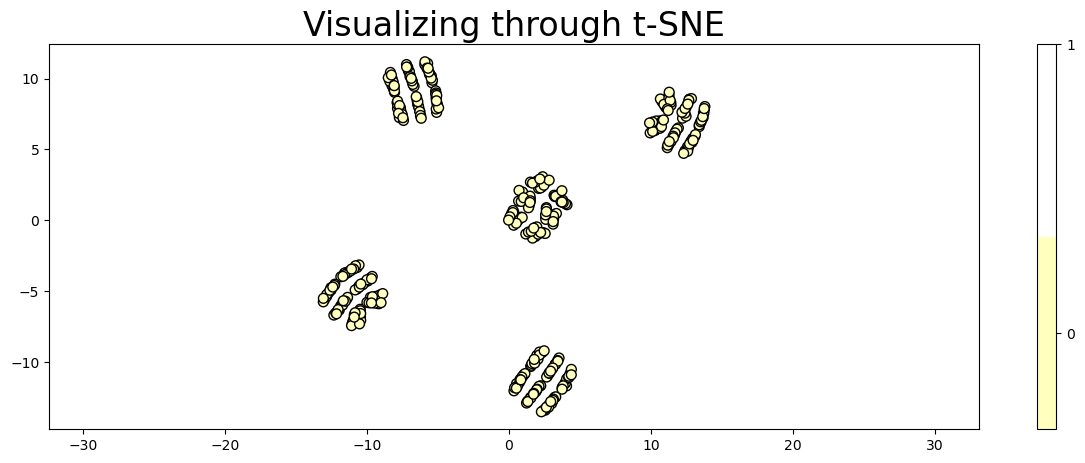

In [12]:
x_subset = data[:]
y_subset = [np.argmax(x) for x in label]

print(np.unique(y_subset))
x_subset=x_subset.reshape((x_subset.shape[0],x_subset.shape[1]))
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 50, c=y_subset, cmap='Spectral',edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(2)-0.5).set_ticks(np.arange(2))
plt.title('Visualizing through t-SNE', fontsize=24);

In [13]:
kmeans = KMeans(5)
kmeans.fit(data)
identified_clusters = kmeans.fit_predict(data)
# identified_clusters

In [14]:
count=[i for i in range(5)]
Train,Test=[],[]
TrainLabel, TestLabel=[],[]
for i in range(len(data)):
    x=identified_clusters[i]
    if x==0 and count[0] < 16:
        count[0]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==1 and count[1] < 16:
        count[1]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==2 and count[2] < 16:
        count[2]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==3 and count[3] < 17:
        count[3]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==4 and count[4] < 17:
        count[4]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    else:
        Train.append(data[i])
        TrainLabel.append(label[i])
        
Train=np.array(Train)
Test=np.array(Test)
TrainLabel=np.array(TrainLabel)
TestLabel=np.array(TestLabel)        

In [15]:
def MAPE(Y_actual,Y_Predicted):
    summ=0
    for i in range(len(Y_actual)):
        if Y_actual[i]!=0:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i])/Y_actual[i])*100
        else:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i]))*100
            
    mape = summ/len(Y_actual)
    return mape

def score(actual,predicted):
    mape=MAPE(actual,predicted)
    mse=mean_squared_error(actual,predicted)    
    rmse=math.sqrt(mse) 
    r2=r2_score(actual,predicted)
    return mse, rmse, mape[0],r2

In [16]:
top=19

In [17]:
reset_random_seeds(seed)

input_lyr = Input(shape=(top,))
initializer = tf.keras.initializers.HeNormal()
layer1 = Dense(500, activation='relu',kernel_initializer=initializer)(input_lyr)
layer2 = Dense(1000, activation='relu',kernel_initializer=initializer)(layer1)
# layer3 = Dense(5000, activation='relu',kernel_initializer=initializer)(layer2)
# layer4 = Dense(10000, activation='relu',kernel_initializer=initializer)(layer3)
# d11=Dropout(0.01)(layer3)
output_layer = Dense(1)(layer2)
model = Model(input_lyr, output_layer)

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense (Dense)                (None, 500)               10000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 512,001
Trainable params: 512,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
reset_random_seeds(seed)

callback=keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1.0e-4, patience=100, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
history = model.fit(Train, TrainLabel, epochs=50000, batch_size=512,  validation_data=(Test, TestLabel), callbacks=[callback], shuffle=True)


Epoch 1/50000
1/1 [==============================] - 1s 781ms/step - loss: 567202.9375 - val_loss: 575187.9375
Epoch 2/50000
1/1 [==============================] - 0s 27ms/step - loss: 562033.8750 - val_loss: 569940.8750
Epoch 3/50000
1/1 [==============================] - 0s 27ms/step - loss: 556896.1250 - val_loss: 564683.0625
Epoch 4/50000
1/1 [==============================] - 0s 26ms/step - loss: 551748.3750 - val_loss: 559335.0000
Epoch 5/50000
1/1 [==============================] - 0s 29ms/step - loss: 546514.0000 - val_loss: 553841.7500
Epoch 6/50000
1/1 [==============================] - 0s 26ms/step - loss: 541143.0000 - val_loss: 548155.5000
Epoch 7/50000
1/1 [==============================] - 0s 26ms/step - loss: 535580.5625 - val_loss: 542207.5625
Epoch 8/50000
1/1 [==============================] - 0s 26ms/step - loss: 529770.0625 - val_loss: 535958.6250
Epoch 9/50000
1/1 [==============================] - 0s 26ms/step - loss: 523666.3750 - val_loss: 529375.0625
Epoch 10/

1/1 [==============================] - 0s 27ms/step - loss: 49410.2969 - val_loss: 43697.1133
Epoch 76/50000
1/1 [==============================] - 0s 26ms/step - loss: 48920.1914 - val_loss: 43364.9844
Epoch 77/50000
1/1 [==============================] - 0s 26ms/step - loss: 48465.1406 - val_loss: 43034.0430
Epoch 78/50000
1/1 [==============================] - 0s 26ms/step - loss: 48027.7500 - val_loss: 42690.9844
Epoch 79/50000
1/1 [==============================] - 0s 26ms/step - loss: 47593.4844 - val_loss: 42326.0859
Epoch 80/50000
1/1 [==============================] - 0s 26ms/step - loss: 47151.9180 - val_loss: 41933.3945
Epoch 81/50000
1/1 [==============================] - 0s 26ms/step - loss: 46696.1602 - val_loss: 41511.5469
Epoch 82/50000
1/1 [==============================] - 0s 25ms/step - loss: 46223.0820 - val_loss: 41061.2188
Epoch 83/50000
1/1 [==============================] - 0s 26ms/step - loss: 45732.0156 - val_loss: 40585.8828
Epoch 84/50000
1/1 [==============

Epoch 150/50000
1/1 [==============================] - 0s 25ms/step - loss: 18836.4746 - val_loss: 15679.2861
Epoch 151/50000
1/1 [==============================] - 0s 25ms/step - loss: 18516.6074 - val_loss: 15397.4795
Epoch 152/50000
1/1 [==============================] - 0s 25ms/step - loss: 18199.2930 - val_loss: 15118.9258
Epoch 153/50000
1/1 [==============================] - 0s 25ms/step - loss: 17884.8145 - val_loss: 14843.3125
Epoch 154/50000
1/1 [==============================] - 0s 26ms/step - loss: 17573.1523 - val_loss: 14570.5176
Epoch 155/50000
1/1 [==============================] - 0s 26ms/step - loss: 17263.3906 - val_loss: 14301.0000
Epoch 156/50000
1/1 [==============================] - 0s 27ms/step - loss: 16955.9219 - val_loss: 14034.3135
Epoch 157/50000
1/1 [==============================] - 0s 24ms/step - loss: 16650.6523 - val_loss: 13770.6680
Epoch 158/50000
1/1 [==============================] - 0s 24ms/step - loss: 16347.8633 - val_loss: 13509.8643
Epoch 159/

1/1 [==============================] - 0s 25ms/step - loss: 4589.5625 - val_loss: 4084.6589
Epoch 226/50000
1/1 [==============================] - 0s 25ms/step - loss: 4542.4238 - val_loss: 4059.4209
Epoch 227/50000
1/1 [==============================] - 0s 25ms/step - loss: 4497.6035 - val_loss: 4036.1133
Epoch 228/50000
1/1 [==============================] - 0s 26ms/step - loss: 4454.8950 - val_loss: 4014.4932
Epoch 229/50000
1/1 [==============================] - 0s 26ms/step - loss: 4414.3081 - val_loss: 3994.2634
Epoch 230/50000
1/1 [==============================] - 0s 25ms/step - loss: 4375.7588 - val_loss: 3975.5183
Epoch 231/50000
1/1 [==============================] - 0s 26ms/step - loss: 4338.9785 - val_loss: 3957.8616
Epoch 232/50000
1/1 [==============================] - 0s 25ms/step - loss: 4303.9092 - val_loss: 3941.1145
Epoch 233/50000
1/1 [==============================] - 0s 25ms/step - loss: 4270.4937 - val_loss: 3925.3376
Epoch 234/50000
1/1 [=======================

1/1 [==============================] - 0s 23ms/step - loss: 3296.8762 - val_loss: 3300.2214
Epoch 302/50000
1/1 [==============================] - 0s 24ms/step - loss: 3289.3513 - val_loss: 3293.0754
Epoch 303/50000
1/1 [==============================] - 0s 23ms/step - loss: 3281.8538 - val_loss: 3285.8936
Epoch 304/50000
1/1 [==============================] - 0s 23ms/step - loss: 3274.3645 - val_loss: 3278.7004
Epoch 305/50000
1/1 [==============================] - 0s 25ms/step - loss: 3266.9797 - val_loss: 3271.5188
Epoch 306/50000
1/1 [==============================] - 0s 25ms/step - loss: 3259.7024 - val_loss: 3264.4014
Epoch 307/50000
1/1 [==============================] - 0s 25ms/step - loss: 3252.4785 - val_loss: 3257.2148
Epoch 308/50000
1/1 [==============================] - 0s 25ms/step - loss: 3245.2737 - val_loss: 3249.9993
Epoch 309/50000
1/1 [==============================] - 0s 25ms/step - loss: 3238.1067 - val_loss: 3242.7678
Epoch 310/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 2833.3022 - val_loss: 2817.2417
Epoch 378/50000
1/1 [==============================] - 0s 25ms/step - loss: 2828.2566 - val_loss: 2812.7847
Epoch 379/50000
1/1 [==============================] - 0s 24ms/step - loss: 2823.2317 - val_loss: 2808.1624
Epoch 380/50000
1/1 [==============================] - 0s 25ms/step - loss: 2818.2290 - val_loss: 2803.0139
Epoch 381/50000
1/1 [==============================] - 0s 25ms/step - loss: 2813.2463 - val_loss: 2797.3955
Epoch 382/50000
1/1 [==============================] - 0s 25ms/step - loss: 2808.2905 - val_loss: 2791.7678
Epoch 383/50000
1/1 [==============================] - 0s 25ms/step - loss: 2803.3538 - val_loss: 2786.2578
Epoch 384/50000
1/1 [==============================] - 0s 25ms/step - loss: 2798.4453 - val_loss: 2780.6763
Epoch 385/50000
1/1 [==============================] - 0s 25ms/step - loss: 2793.5464 - val_loss: 2775.6284
Epoch 386/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 2486.3364 - val_loss: 2447.2559
Epoch 454/50000
1/1 [==============================] - 0s 25ms/step - loss: 2482.1748 - val_loss: 2443.1694
Epoch 455/50000
1/1 [==============================] - 0s 25ms/step - loss: 2478.0417 - val_loss: 2438.8594
Epoch 456/50000
1/1 [==============================] - 0s 25ms/step - loss: 2473.9004 - val_loss: 2434.7053
Epoch 457/50000
1/1 [==============================] - 0s 25ms/step - loss: 2469.7488 - val_loss: 2430.7556
Epoch 458/50000
1/1 [==============================] - 0s 25ms/step - loss: 2465.5938 - val_loss: 2426.5256
Epoch 459/50000
1/1 [==============================] - 0s 25ms/step - loss: 2461.4336 - val_loss: 2421.9370
Epoch 460/50000
1/1 [==============================] - 0s 25ms/step - loss: 2457.2466 - val_loss: 2417.0322
Epoch 461/50000
1/1 [==============================] - 0s 25ms/step - loss: 2453.0381 - val_loss: 2412.2686
Epoch 462/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 2163.5427 - val_loss: 2128.3950
Epoch 530/50000
1/1 [==============================] - 0s 28ms/step - loss: 2159.5410 - val_loss: 2123.5139
Epoch 531/50000
1/1 [==============================] - 0s 25ms/step - loss: 2155.5635 - val_loss: 2119.6682
Epoch 532/50000
1/1 [==============================] - 0s 25ms/step - loss: 2151.5645 - val_loss: 2115.9370
Epoch 533/50000
1/1 [==============================] - 0s 25ms/step - loss: 2147.5928 - val_loss: 2112.2131
Epoch 534/50000
1/1 [==============================] - 0s 26ms/step - loss: 2143.6348 - val_loss: 2108.3660
Epoch 535/50000
1/1 [==============================] - 0s 25ms/step - loss: 2139.6729 - val_loss: 2104.1077
Epoch 536/50000
1/1 [==============================] - 0s 25ms/step - loss: 2135.7087 - val_loss: 2099.8469
Epoch 537/50000
1/1 [==============================] - 0s 26ms/step - loss: 2131.7507 - val_loss: 2095.5012
Epoch 538/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 1894.1884 - val_loss: 1875.5447
Epoch 606/50000
1/1 [==============================] - 0s 27ms/step - loss: 1891.1545 - val_loss: 1874.1649
Epoch 607/50000
1/1 [==============================] - 0s 28ms/step - loss: 1888.1489 - val_loss: 1871.2261
Epoch 608/50000
1/1 [==============================] - 0s 25ms/step - loss: 1885.1510 - val_loss: 1867.2678
Epoch 609/50000
1/1 [==============================] - 0s 24ms/step - loss: 1882.1841 - val_loss: 1862.9271
Epoch 610/50000
1/1 [==============================] - 0s 25ms/step - loss: 1879.2302 - val_loss: 1859.8212
Epoch 611/50000
1/1 [==============================] - 0s 25ms/step - loss: 1876.3127 - val_loss: 1858.4473
Epoch 612/50000
1/1 [==============================] - 0s 25ms/step - loss: 1873.3494 - val_loss: 1858.2046
Epoch 613/50000
1/1 [==============================] - 0s 25ms/step - loss: 1870.4214 - val_loss: 1857.3663
Epoch 614/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 1692.7192 - val_loss: 1715.1270
Epoch 682/50000
1/1 [==============================] - 0s 26ms/step - loss: 1690.4626 - val_loss: 1714.9207
Epoch 683/50000
1/1 [==============================] - 0s 25ms/step - loss: 1688.2388 - val_loss: 1713.4034
Epoch 684/50000
1/1 [==============================] - 0s 26ms/step - loss: 1686.0023 - val_loss: 1710.5980
Epoch 685/50000
1/1 [==============================] - 0s 25ms/step - loss: 1683.7750 - val_loss: 1707.6255
Epoch 686/50000
1/1 [==============================] - 0s 25ms/step - loss: 1681.5667 - val_loss: 1706.0447
Epoch 687/50000
1/1 [==============================] - 0s 25ms/step - loss: 1679.4110 - val_loss: 1705.7207
Epoch 688/50000
1/1 [==============================] - 0s 26ms/step - loss: 1677.2285 - val_loss: 1705.6478
Epoch 689/50000
1/1 [==============================] - 0s 25ms/step - loss: 1675.0658 - val_loss: 1704.0870
Epoch 690/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 1545.2432 - val_loss: 1608.7944
Epoch 758/50000
1/1 [==============================] - 0s 25ms/step - loss: 1543.5481 - val_loss: 1608.7915
Epoch 759/50000
1/1 [==============================] - 0s 26ms/step - loss: 1541.8357 - val_loss: 1608.1385
Epoch 760/50000
1/1 [==============================] - 0s 27ms/step - loss: 1540.1205 - val_loss: 1606.4917
Epoch 761/50000
1/1 [==============================] - 0s 27ms/step - loss: 1538.4485 - val_loss: 1604.0767
Epoch 762/50000
1/1 [==============================] - 0s 26ms/step - loss: 1536.7358 - val_loss: 1601.6046
Epoch 763/50000
1/1 [==============================] - 0s 25ms/step - loss: 1535.0994 - val_loss: 1600.2933
Epoch 764/50000
1/1 [==============================] - 0s 27ms/step - loss: 1533.4137 - val_loss: 1599.8936
Epoch 765/50000
1/1 [==============================] - 0s 27ms/step - loss: 1531.7051 - val_loss: 1599.1094
Epoch 766/50000
1/1 [=======================

1/1 [==============================] - 0s 27ms/step - loss: 1423.0404 - val_loss: 1538.1953
Epoch 834/50000
1/1 [==============================] - 0s 27ms/step - loss: 1421.4987 - val_loss: 1537.5059
Epoch 835/50000
1/1 [==============================] - 0s 24ms/step - loss: 1419.9305 - val_loss: 1536.9124
Epoch 836/50000
1/1 [==============================] - 0s 26ms/step - loss: 1418.2848 - val_loss: 1536.1144
Epoch 837/50000
1/1 [==============================] - 0s 26ms/step - loss: 1416.5638 - val_loss: 1536.0062
Epoch 838/50000
1/1 [==============================] - 0s 25ms/step - loss: 1414.7186 - val_loss: 1536.1130
Epoch 839/50000
1/1 [==============================] - 0s 24ms/step - loss: 1412.9236 - val_loss: 1536.2228
Epoch 840/50000
1/1 [==============================] - 0s 25ms/step - loss: 1411.1158 - val_loss: 1536.0157
Epoch 841/50000
1/1 [==============================] - 0s 24ms/step - loss: 1409.2771 - val_loss: 1535.6674
Epoch 842/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 1300.0903 - val_loss: 1506.5161
Epoch 910/50000
1/1 [==============================] - 0s 25ms/step - loss: 1298.7834 - val_loss: 1505.4243
Epoch 911/50000
1/1 [==============================] - 0s 26ms/step - loss: 1297.4542 - val_loss: 1503.9849
Epoch 912/50000
1/1 [==============================] - 0s 26ms/step - loss: 1296.1265 - val_loss: 1503.2458
Epoch 913/50000
1/1 [==============================] - 0s 25ms/step - loss: 1294.8589 - val_loss: 1503.2905
Epoch 914/50000
1/1 [==============================] - 0s 25ms/step - loss: 1293.5868 - val_loss: 1502.6292
Epoch 915/50000
1/1 [==============================] - 0s 25ms/step - loss: 1292.3081 - val_loss: 1501.0798
Epoch 916/50000
1/1 [==============================] - 0s 25ms/step - loss: 1291.0337 - val_loss: 1500.4659
Epoch 917/50000
1/1 [==============================] - 0s 25ms/step - loss: 1289.7806 - val_loss: 1500.4194
Epoch 918/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 1209.5557 - val_loss: 1461.6580
Epoch 986/50000
1/1 [==============================] - 0s 28ms/step - loss: 1208.4340 - val_loss: 1460.5858
Epoch 987/50000
1/1 [==============================] - 0s 24ms/step - loss: 1207.3293 - val_loss: 1460.1256
Epoch 988/50000
1/1 [==============================] - 0s 25ms/step - loss: 1206.2141 - val_loss: 1459.5697
Epoch 989/50000
1/1 [==============================] - 0s 25ms/step - loss: 1205.0951 - val_loss: 1459.5413
Epoch 990/50000
1/1 [==============================] - 0s 24ms/step - loss: 1203.9835 - val_loss: 1459.2698
Epoch 991/50000
1/1 [==============================] - 0s 24ms/step - loss: 1202.8722 - val_loss: 1458.5070
Epoch 992/50000
1/1 [==============================] - 0s 27ms/step - loss: 1201.7788 - val_loss: 1457.5409
Epoch 993/50000
1/1 [==============================] - 0s 25ms/step - loss: 1200.6799 - val_loss: 1456.5229
Epoch 994/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 1129.3727 - val_loss: 1429.6444
Epoch 1061/50000
1/1 [==============================] - 0s 28ms/step - loss: 1128.3303 - val_loss: 1427.8190
Epoch 1062/50000
1/1 [==============================] - 0s 25ms/step - loss: 1127.3167 - val_loss: 1428.4419
Epoch 1063/50000
1/1 [==============================] - 0s 27ms/step - loss: 1126.2806 - val_loss: 1429.5234
Epoch 1064/50000
1/1 [==============================] - 0s 28ms/step - loss: 1125.2657 - val_loss: 1429.9703
Epoch 1065/50000
1/1 [==============================] - 0s 24ms/step - loss: 1124.2449 - val_loss: 1428.4086
Epoch 1066/50000
1/1 [==============================] - 0s 24ms/step - loss: 1123.2301 - val_loss: 1426.7783
Epoch 1067/50000
1/1 [==============================] - 0s 25ms/step - loss: 1122.2271 - val_loss: 1426.3521
Epoch 1068/50000
1/1 [==============================] - 0s 27ms/step - loss: 1121.2002 - val_loss: 1426.6401
Epoch 1069/50000
1/1 [==============

1/1 [==============================] - 0s 24ms/step - loss: 1056.2400 - val_loss: 1403.7968
Epoch 1136/50000
1/1 [==============================] - 0s 26ms/step - loss: 1055.3156 - val_loss: 1403.4429
Epoch 1137/50000
1/1 [==============================] - 0s 26ms/step - loss: 1054.3964 - val_loss: 1403.9421
Epoch 1138/50000
1/1 [==============================] - 0s 24ms/step - loss: 1053.4677 - val_loss: 1403.1949
Epoch 1139/50000
1/1 [==============================] - 0s 26ms/step - loss: 1052.5708 - val_loss: 1399.3779
Epoch 1140/50000
1/1 [==============================] - 0s 25ms/step - loss: 1051.6581 - val_loss: 1398.7246
Epoch 1141/50000
1/1 [==============================] - 0s 26ms/step - loss: 1050.7604 - val_loss: 1401.5494
Epoch 1142/50000
1/1 [==============================] - 0s 29ms/step - loss: 1049.8293 - val_loss: 1401.9855
Epoch 1143/50000
1/1 [==============================] - 0s 26ms/step - loss: 1048.9153 - val_loss: 1400.4199
Epoch 1144/50000
1/1 [==============

1/1 [==============================] - 0s 24ms/step - loss: 989.7750 - val_loss: 1378.0377
Epoch 1211/50000
1/1 [==============================] - 0s 26ms/step - loss: 988.9016 - val_loss: 1375.8448
Epoch 1212/50000
1/1 [==============================] - 0s 26ms/step - loss: 988.0328 - val_loss: 1375.6216
Epoch 1213/50000
1/1 [==============================] - 0s 32ms/step - loss: 987.1765 - val_loss: 1378.2615
Epoch 1214/50000
1/1 [==============================] - 0s 29ms/step - loss: 986.3005 - val_loss: 1378.1704
Epoch 1215/50000
1/1 [==============================] - 0s 27ms/step - loss: 985.4536 - val_loss: 1374.9415
Epoch 1216/50000
1/1 [==============================] - 0s 27ms/step - loss: 984.6169 - val_loss: 1374.0105
Epoch 1217/50000
1/1 [==============================] - 0s 26ms/step - loss: 983.7464 - val_loss: 1375.3569
Epoch 1218/50000
1/1 [==============================] - 0s 28ms/step - loss: 982.9182 - val_loss: 1375.9252
Epoch 1219/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 926.6600 - val_loss: 1357.2150
Epoch 1287/50000
1/1 [==============================] - 0s 25ms/step - loss: 925.8273 - val_loss: 1354.0790
Epoch 1288/50000
1/1 [==============================] - 0s 26ms/step - loss: 925.0261 - val_loss: 1354.9324
Epoch 1289/50000
1/1 [==============================] - 0s 24ms/step - loss: 924.2156 - val_loss: 1357.6119
Epoch 1290/50000
1/1 [==============================] - 0s 26ms/step - loss: 923.4124 - val_loss: 1356.9855
Epoch 1291/50000
1/1 [==============================] - 0s 24ms/step - loss: 922.5943 - val_loss: 1354.0798
Epoch 1292/50000
1/1 [==============================] - 0s 25ms/step - loss: 921.7682 - val_loss: 1351.9636
Epoch 1293/50000
1/1 [==============================] - 0s 25ms/step - loss: 920.9692 - val_loss: 1352.6499
Epoch 1294/50000
1/1 [==============================] - 0s 24ms/step - loss: 920.1749 - val_loss: 1353.1105
Epoch 1295/50000
1/1 [=======================

1/1 [==============================] - 0s 23ms/step - loss: 863.8741 - val_loss: 1323.1903
Epoch 1363/50000
1/1 [==============================] - 0s 22ms/step - loss: 862.9793 - val_loss: 1321.5466
Epoch 1364/50000
1/1 [==============================] - 0s 22ms/step - loss: 862.0933 - val_loss: 1321.8217
Epoch 1365/50000
1/1 [==============================] - 0s 22ms/step - loss: 861.2090 - val_loss: 1323.1307
Epoch 1366/50000
1/1 [==============================] - 0s 24ms/step - loss: 860.3135 - val_loss: 1321.9694
Epoch 1367/50000
1/1 [==============================] - 0s 24ms/step - loss: 859.4243 - val_loss: 1318.4595
Epoch 1368/50000
1/1 [==============================] - 0s 25ms/step - loss: 858.5713 - val_loss: 1319.4069
Epoch 1369/50000
1/1 [==============================] - 0s 24ms/step - loss: 857.6557 - val_loss: 1321.7159
Epoch 1370/50000
1/1 [==============================] - 0s 26ms/step - loss: 856.7691 - val_loss: 1320.6809
Epoch 1371/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 794.4881 - val_loss: 1291.7206
Epoch 1439/50000
1/1 [==============================] - 0s 26ms/step - loss: 793.5851 - val_loss: 1289.0385
Epoch 1440/50000
1/1 [==============================] - 0s 25ms/step - loss: 792.6774 - val_loss: 1286.7238
Epoch 1441/50000
1/1 [==============================] - 0s 25ms/step - loss: 791.7563 - val_loss: 1289.2672
Epoch 1442/50000
1/1 [==============================] - 0s 24ms/step - loss: 790.8040 - val_loss: 1291.0022
Epoch 1443/50000
1/1 [==============================] - 0s 25ms/step - loss: 789.9692 - val_loss: 1284.3661
Epoch 1444/50000
1/1 [==============================] - 0s 25ms/step - loss: 789.0727 - val_loss: 1284.2262
Epoch 1445/50000
1/1 [==============================] - 0s 25ms/step - loss: 788.1488 - val_loss: 1289.4788
Epoch 1446/50000
1/1 [==============================] - 0s 25ms/step - loss: 787.2128 - val_loss: 1289.6392
Epoch 1447/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 730.4612 - val_loss: 1257.1841
Epoch 1515/50000
1/1 [==============================] - 0s 26ms/step - loss: 729.6570 - val_loss: 1258.7708
Epoch 1516/50000
1/1 [==============================] - 0s 26ms/step - loss: 728.8813 - val_loss: 1258.1841
Epoch 1517/50000
1/1 [==============================] - 0s 24ms/step - loss: 728.0777 - val_loss: 1257.4821
Epoch 1518/50000
1/1 [==============================] - 0s 24ms/step - loss: 727.2678 - val_loss: 1257.6284
Epoch 1519/50000
1/1 [==============================] - 0s 27ms/step - loss: 726.5540 - val_loss: 1256.1956
Epoch 1520/50000
1/1 [==============================] - 0s 27ms/step - loss: 725.7994 - val_loss: 1255.0137
Epoch 1521/50000
1/1 [==============================] - 0s 25ms/step - loss: 725.0647 - val_loss: 1256.1549
Epoch 1522/50000
1/1 [==============================] - 0s 24ms/step - loss: 724.2910 - val_loss: 1257.1219
Epoch 1523/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 675.8763 - val_loss: 1238.1656
Epoch 1591/50000
1/1 [==============================] - 0s 24ms/step - loss: 675.1652 - val_loss: 1238.4454
Epoch 1592/50000
1/1 [==============================] - 0s 24ms/step - loss: 674.4929 - val_loss: 1238.2545
Epoch 1593/50000
1/1 [==============================] - 0s 26ms/step - loss: 673.8785 - val_loss: 1237.9526
Epoch 1594/50000
1/1 [==============================] - 0s 25ms/step - loss: 673.2222 - val_loss: 1238.9523
Epoch 1595/50000
1/1 [==============================] - 0s 26ms/step - loss: 672.5433 - val_loss: 1235.3390
Epoch 1596/50000
1/1 [==============================] - 0s 26ms/step - loss: 671.8894 - val_loss: 1235.9512
Epoch 1597/50000
1/1 [==============================] - 0s 24ms/step - loss: 671.2328 - val_loss: 1238.0929
Epoch 1598/50000
1/1 [==============================] - 0s 26ms/step - loss: 670.5732 - val_loss: 1236.6870
Epoch 1599/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 627.0657 - val_loss: 1221.9868
Epoch 1667/50000
1/1 [==============================] - 0s 25ms/step - loss: 626.4117 - val_loss: 1223.2263
Epoch 1668/50000
1/1 [==============================] - 0s 24ms/step - loss: 625.8273 - val_loss: 1220.5063
Epoch 1669/50000
1/1 [==============================] - 0s 26ms/step - loss: 625.1827 - val_loss: 1219.3784
Epoch 1670/50000
1/1 [==============================] - 0s 26ms/step - loss: 624.5198 - val_loss: 1220.9835
Epoch 1671/50000
1/1 [==============================] - 0s 25ms/step - loss: 623.9431 - val_loss: 1221.4399
Epoch 1672/50000
1/1 [==============================] - 0s 25ms/step - loss: 623.2916 - val_loss: 1220.4736
Epoch 1673/50000
1/1 [==============================] - 0s 24ms/step - loss: 622.6733 - val_loss: 1220.3540
Epoch 1674/50000
1/1 [==============================] - 0s 25ms/step - loss: 622.0454 - val_loss: 1221.5570
Epoch 1675/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 581.8162 - val_loss: 1201.9747
Epoch 1743/50000
1/1 [==============================] - 0s 25ms/step - loss: 581.2430 - val_loss: 1198.4082
Epoch 1744/50000
1/1 [==============================] - 0s 25ms/step - loss: 580.6891 - val_loss: 1202.3789
Epoch 1745/50000
1/1 [==============================] - 0s 24ms/step - loss: 580.1026 - val_loss: 1205.4874
Epoch 1746/50000
1/1 [==============================] - 0s 26ms/step - loss: 579.5676 - val_loss: 1200.3983
Epoch 1747/50000
1/1 [==============================] - 0s 26ms/step - loss: 578.9890 - val_loss: 1198.4800
Epoch 1748/50000
1/1 [==============================] - 0s 26ms/step - loss: 578.4526 - val_loss: 1201.9182
Epoch 1749/50000
1/1 [==============================] - 0s 25ms/step - loss: 577.8931 - val_loss: 1203.4419
Epoch 1750/50000
1/1 [==============================] - 0s 24ms/step - loss: 577.3530 - val_loss: 1200.9653
Epoch 1751/50000
1/1 [=======================

1/1 [==============================] - 0s 27ms/step - loss: 542.1932 - val_loss: 1189.4336
Epoch 1819/50000
1/1 [==============================] - 0s 26ms/step - loss: 541.6686 - val_loss: 1186.2612
Epoch 1820/50000
1/1 [==============================] - 0s 27ms/step - loss: 541.1982 - val_loss: 1187.2676
Epoch 1821/50000
1/1 [==============================] - 0s 25ms/step - loss: 540.7050 - val_loss: 1188.6552
Epoch 1822/50000
1/1 [==============================] - 0s 26ms/step - loss: 540.1943 - val_loss: 1186.5146
Epoch 1823/50000
1/1 [==============================] - 0s 26ms/step - loss: 539.6907 - val_loss: 1186.4631
Epoch 1824/50000
1/1 [==============================] - 0s 26ms/step - loss: 539.1740 - val_loss: 1186.5533
Epoch 1825/50000
1/1 [==============================] - 0s 24ms/step - loss: 538.6693 - val_loss: 1185.5518
Epoch 1826/50000
1/1 [==============================] - 0s 25ms/step - loss: 538.1644 - val_loss: 1185.0104
Epoch 1827/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 505.9924 - val_loss: 1163.9406
Epoch 1895/50000
1/1 [==============================] - 0s 26ms/step - loss: 505.5137 - val_loss: 1165.6643
Epoch 1896/50000
1/1 [==============================] - 0s 26ms/step - loss: 505.0979 - val_loss: 1160.0176
Epoch 1897/50000
1/1 [==============================] - 0s 25ms/step - loss: 504.6661 - val_loss: 1164.0725
Epoch 1898/50000
1/1 [==============================] - 0s 24ms/step - loss: 504.1775 - val_loss: 1165.2887
Epoch 1899/50000
1/1 [==============================] - 0s 24ms/step - loss: 503.7401 - val_loss: 1161.5391
Epoch 1900/50000
1/1 [==============================] - 0s 26ms/step - loss: 503.3068 - val_loss: 1162.8409
Epoch 1901/50000
1/1 [==============================] - 0s 26ms/step - loss: 502.8393 - val_loss: 1163.9746
Epoch 1902/50000
1/1 [==============================] - 0s 26ms/step - loss: 502.3834 - val_loss: 1159.5472
Epoch 1903/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 473.2395 - val_loss: 1145.4301
Epoch 1971/50000
1/1 [==============================] - 0s 26ms/step - loss: 472.8602 - val_loss: 1142.5688
Epoch 1972/50000
1/1 [==============================] - 0s 25ms/step - loss: 472.4777 - val_loss: 1144.5255
Epoch 1973/50000
1/1 [==============================] - 0s 26ms/step - loss: 472.0709 - val_loss: 1144.3960
Epoch 1974/50000
1/1 [==============================] - 0s 26ms/step - loss: 471.7176 - val_loss: 1141.6831
Epoch 1975/50000
1/1 [==============================] - 0s 25ms/step - loss: 471.3243 - val_loss: 1142.6613
Epoch 1976/50000
1/1 [==============================] - 0s 24ms/step - loss: 470.9413 - val_loss: 1143.4479
Epoch 1977/50000
1/1 [==============================] - 0s 26ms/step - loss: 470.5615 - val_loss: 1142.6788
Epoch 1978/50000
1/1 [==============================] - 0s 27ms/step - loss: 470.1743 - val_loss: 1141.8785
Epoch 1979/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 444.9758 - val_loss: 1130.7637
Epoch 2047/50000
1/1 [==============================] - 0s 23ms/step - loss: 444.5988 - val_loss: 1131.2170
Epoch 2048/50000
1/1 [==============================] - 0s 23ms/step - loss: 444.2679 - val_loss: 1132.4553
Epoch 2049/50000
1/1 [==============================] - 0s 25ms/step - loss: 443.9533 - val_loss: 1132.4592
Epoch 2050/50000
1/1 [==============================] - 0s 24ms/step - loss: 443.6042 - val_loss: 1129.9744
Epoch 2051/50000
1/1 [==============================] - 0s 25ms/step - loss: 443.2527 - val_loss: 1130.1909
Epoch 2052/50000
1/1 [==============================] - 0s 24ms/step - loss: 442.9249 - val_loss: 1131.5510
Epoch 2053/50000
1/1 [==============================] - 0s 25ms/step - loss: 442.5666 - val_loss: 1132.8579
Epoch 2054/50000
1/1 [==============================] - 0s 24ms/step - loss: 442.2567 - val_loss: 1129.5229
Epoch 2055/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 420.0682 - val_loss: 1116.0488
Epoch 2123/50000
1/1 [==============================] - 0s 25ms/step - loss: 419.7451 - val_loss: 1116.7935
Epoch 2124/50000
1/1 [==============================] - 0s 27ms/step - loss: 419.4615 - val_loss: 1113.8706
Epoch 2125/50000
1/1 [==============================] - 0s 25ms/step - loss: 419.1960 - val_loss: 1117.2648
Epoch 2126/50000
1/1 [==============================] - 0s 24ms/step - loss: 418.8445 - val_loss: 1116.8027
Epoch 2127/50000
1/1 [==============================] - 0s 24ms/step - loss: 418.5784 - val_loss: 1115.0419
Epoch 2128/50000
1/1 [==============================] - 0s 26ms/step - loss: 418.2947 - val_loss: 1115.3022
Epoch 2129/50000
1/1 [==============================] - 0s 25ms/step - loss: 418.0016 - val_loss: 1115.6625
Epoch 2130/50000
1/1 [==============================] - 0s 26ms/step - loss: 417.6533 - val_loss: 1114.6509
Epoch 2131/50000
1/1 [=======================

1/1 [==============================] - 0s 27ms/step - loss: 397.2528 - val_loss: 1104.7229
Epoch 2199/50000
1/1 [==============================] - 0s 28ms/step - loss: 396.9597 - val_loss: 1100.5148
Epoch 2200/50000
1/1 [==============================] - 0s 24ms/step - loss: 396.6237 - val_loss: 1099.5837
Epoch 2201/50000
1/1 [==============================] - 0s 26ms/step - loss: 396.3549 - val_loss: 1104.0454
Epoch 2202/50000
1/1 [==============================] - 0s 27ms/step - loss: 396.0830 - val_loss: 1099.1283
Epoch 2203/50000
1/1 [==============================] - 0s 25ms/step - loss: 395.7711 - val_loss: 1099.5936
Epoch 2204/50000
1/1 [==============================] - 0s 25ms/step - loss: 395.4591 - val_loss: 1103.3719
Epoch 2205/50000
1/1 [==============================] - 0s 26ms/step - loss: 395.2053 - val_loss: 1099.3011
Epoch 2206/50000
1/1 [==============================] - 0s 26ms/step - loss: 394.9198 - val_loss: 1102.0083
Epoch 2207/50000
1/1 [=======================

1/1 [==============================] - 0s 27ms/step - loss: 375.7735 - val_loss: 1085.4097
Epoch 2275/50000
1/1 [==============================] - 0s 26ms/step - loss: 375.4991 - val_loss: 1084.6399
Epoch 2276/50000
1/1 [==============================] - 0s 26ms/step - loss: 375.2138 - val_loss: 1087.3496
Epoch 2277/50000
1/1 [==============================] - 0s 26ms/step - loss: 374.9006 - val_loss: 1088.1019
Epoch 2278/50000
1/1 [==============================] - 0s 26ms/step - loss: 374.6146 - val_loss: 1086.0264
Epoch 2279/50000
1/1 [==============================] - 0s 26ms/step - loss: 374.3252 - val_loss: 1085.1378
Epoch 2280/50000
1/1 [==============================] - 0s 26ms/step - loss: 374.0413 - val_loss: 1085.8136
Epoch 2281/50000
1/1 [==============================] - 0s 24ms/step - loss: 373.7660 - val_loss: 1087.0432
Epoch 2282/50000
1/1 [==============================] - 0s 24ms/step - loss: 373.4670 - val_loss: 1082.5092
Epoch 2283/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 352.3700 - val_loss: 1063.8920
Epoch 2351/50000
1/1 [==============================] - 0s 23ms/step - loss: 352.0250 - val_loss: 1062.3446
Epoch 2352/50000
1/1 [==============================] - 0s 26ms/step - loss: 351.7150 - val_loss: 1062.2086
Epoch 2353/50000
1/1 [==============================] - 0s 25ms/step - loss: 351.3754 - val_loss: 1062.8811
Epoch 2354/50000
1/1 [==============================] - 0s 25ms/step - loss: 351.0372 - val_loss: 1059.9969
Epoch 2355/50000
1/1 [==============================] - 0s 26ms/step - loss: 350.7081 - val_loss: 1061.2905
Epoch 2356/50000
1/1 [==============================] - 0s 27ms/step - loss: 350.3842 - val_loss: 1062.2963
Epoch 2357/50000
1/1 [==============================] - 0s 24ms/step - loss: 350.0421 - val_loss: 1057.4415
Epoch 2358/50000
1/1 [==============================] - 0s 27ms/step - loss: 349.7219 - val_loss: 1062.9447
Epoch 2359/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 329.4968 - val_loss: 1038.0616
Epoch 2427/50000
1/1 [==============================] - 0s 24ms/step - loss: 329.2572 - val_loss: 1030.7628
Epoch 2428/50000
1/1 [==============================] - 0s 28ms/step - loss: 328.9955 - val_loss: 1034.8131
Epoch 2429/50000
1/1 [==============================] - 0s 27ms/step - loss: 328.6921 - val_loss: 1035.3246
Epoch 2430/50000
1/1 [==============================] - 0s 27ms/step - loss: 328.4319 - val_loss: 1030.3003
Epoch 2431/50000
1/1 [==============================] - 0s 25ms/step - loss: 328.2141 - val_loss: 1036.6482
Epoch 2432/50000
1/1 [==============================] - 0s 27ms/step - loss: 327.9633 - val_loss: 1028.9572
Epoch 2433/50000
1/1 [==============================] - 0s 25ms/step - loss: 327.6873 - val_loss: 1029.6158
Epoch 2434/50000
1/1 [==============================] - 0s 24ms/step - loss: 327.4076 - val_loss: 1034.4030
Epoch 2435/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 310.3013 - val_loss: 1017.3001
Epoch 2503/50000
1/1 [==============================] - 0s 27ms/step - loss: 310.1080 - val_loss: 1008.3899
Epoch 2504/50000
1/1 [==============================] - 0s 27ms/step - loss: 309.8463 - val_loss: 1015.1348
Epoch 2505/50000
1/1 [==============================] - 0s 27ms/step - loss: 309.5763 - val_loss: 1009.8382
Epoch 2506/50000
1/1 [==============================] - 0s 25ms/step - loss: 309.3533 - val_loss: 1011.3034
Epoch 2507/50000
1/1 [==============================] - 0s 26ms/step - loss: 309.0758 - val_loss: 1010.1486
Epoch 2508/50000
1/1 [==============================] - 0s 27ms/step - loss: 308.8365 - val_loss: 1007.2599
Epoch 2509/50000
1/1 [==============================] - 0s 27ms/step - loss: 308.6374 - val_loss: 1012.3492
Epoch 2510/50000
1/1 [==============================] - 0s 24ms/step - loss: 308.4266 - val_loss: 1007.0516
Epoch 2511/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 293.5560 - val_loss: 995.5182
Epoch 2579/50000
1/1 [==============================] - 0s 26ms/step - loss: 293.3599 - val_loss: 993.6278
Epoch 2580/50000
1/1 [==============================] - 0s 26ms/step - loss: 293.1435 - val_loss: 992.7496
Epoch 2581/50000
1/1 [==============================] - 0s 25ms/step - loss: 292.9617 - val_loss: 991.6783
Epoch 2582/50000
1/1 [==============================] - 0s 25ms/step - loss: 292.7484 - val_loss: 992.6751
Epoch 2583/50000
1/1 [==============================] - 0s 24ms/step - loss: 292.5382 - val_loss: 993.0395
Epoch 2584/50000
1/1 [==============================] - 0s 27ms/step - loss: 292.3296 - val_loss: 991.6159
Epoch 2585/50000
1/1 [==============================] - 0s 27ms/step - loss: 292.1363 - val_loss: 996.1812
Epoch 2586/50000
1/1 [==============================] - 0s 25ms/step - loss: 291.9816 - val_loss: 987.7863
Epoch 2587/50000
1/1 [==============================] 

1/1 [==============================] - 0s 27ms/step - loss: 278.2306 - val_loss: 974.9085
Epoch 2655/50000
1/1 [==============================] - 0s 26ms/step - loss: 278.0316 - val_loss: 980.7584
Epoch 2656/50000
1/1 [==============================] - 0s 25ms/step - loss: 277.8060 - val_loss: 974.8865
Epoch 2657/50000
1/1 [==============================] - 0s 26ms/step - loss: 277.5996 - val_loss: 981.1306
Epoch 2658/50000
1/1 [==============================] - 0s 24ms/step - loss: 277.3984 - val_loss: 979.4468
Epoch 2659/50000
1/1 [==============================] - 0s 25ms/step - loss: 277.1731 - val_loss: 978.1312
Epoch 2660/50000
1/1 [==============================] - 0s 26ms/step - loss: 276.9621 - val_loss: 979.5215
Epoch 2661/50000
1/1 [==============================] - 0s 24ms/step - loss: 276.7652 - val_loss: 975.5459
Epoch 2662/50000
1/1 [==============================] - 0s 26ms/step - loss: 276.6074 - val_loss: 981.0566
Epoch 2663/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 263.8558 - val_loss: 983.1200
Epoch 2731/50000
1/1 [==============================] - 0s 28ms/step - loss: 263.6489 - val_loss: 974.9088
Epoch 2732/50000
1/1 [==============================] - 0s 24ms/step - loss: 263.3753 - val_loss: 976.1585
Epoch 2733/50000
1/1 [==============================] - 0s 24ms/step - loss: 263.1629 - val_loss: 979.4519
Epoch 2734/50000
1/1 [==============================] - 0s 24ms/step - loss: 263.0055 - val_loss: 974.0048
Epoch 2735/50000
1/1 [==============================] - 0s 24ms/step - loss: 262.8442 - val_loss: 982.4954
Epoch 2736/50000
1/1 [==============================] - 0s 26ms/step - loss: 262.6683 - val_loss: 973.6952
Epoch 2737/50000
1/1 [==============================] - 0s 25ms/step - loss: 262.5569 - val_loss: 984.5176
Epoch 2738/50000
1/1 [==============================] - 0s 26ms/step - loss: 262.3995 - val_loss: 971.0967
Epoch 2739/50000
1/1 [==============================] 

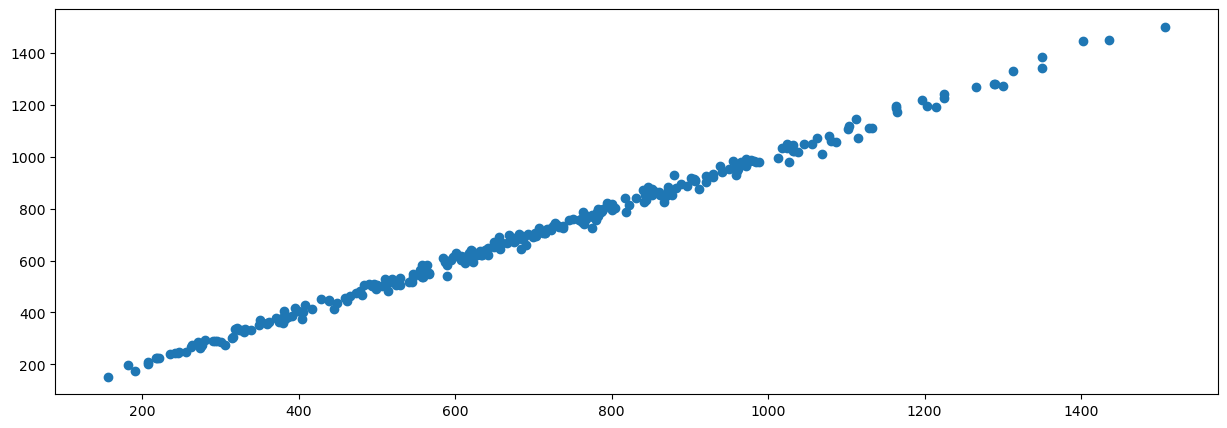

In [22]:
predict=model.predict(Train)
plt.scatter(predict,TrainLabel)

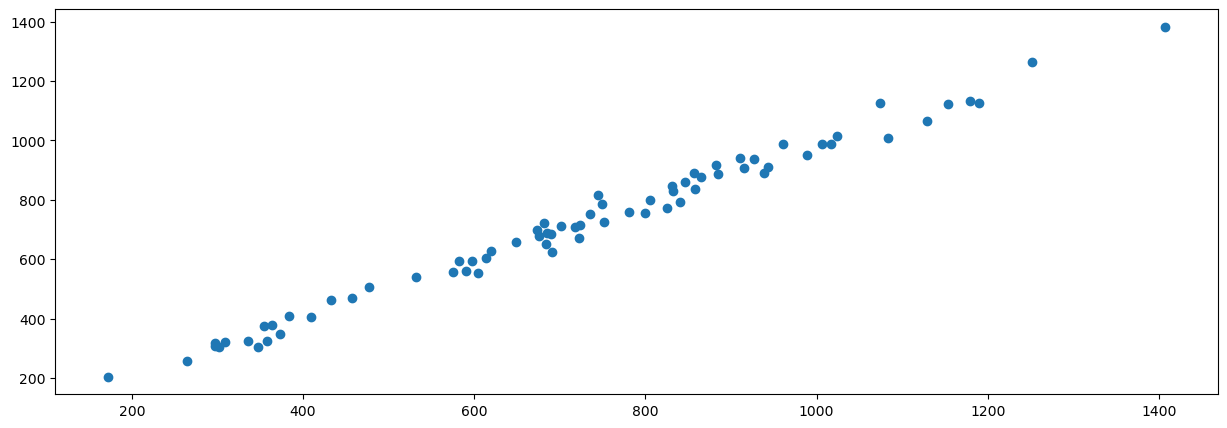

In [23]:
predictt=model.predict(Test)
plt.scatter(predictt,TestLabel)

In [24]:
score(TrainLabel,predict)

(270.2713199507173, 16.439930655289192, 2.0009282, 0.9964911782009624)

In [25]:
score(TestLabel,predictt)

(969.8783176955023, 31.142869451858516, 3.8634305, 0.9858456292754411)

In [26]:
Train.shape

(288, 19)

In [27]:
L1, L2 = [], []

Lyr = [50, 100, 500,  1000, 2000, 5000]
batch = [16, 32, 64, 512]
act = ['relu',  'tanh']
minum =1000

for x in Lyr:
    for y in Lyr:
        if y<=x:
            continue
        for a in act:
            for b in batch:
                
                reset_random_seeds(seed)

                input_lyr = Input(shape=(19,))
                initializer = tf.keras.initializers.HeNormal()
                layer1 = Dense(x, activation=a,kernel_initializer=initializer)(input_lyr)
                layer2 = Dense(y, activation=a,kernel_initializer=initializer)(layer1)
                # layer3 = Dense(5000, activation='relu',kernel_initializer=initializer)(layer2)
                # d11=Dropout(0.01)(layer3)
                output_layer = Dense(1)(layer2)
                model = Model(input_lyr, output_layer)

                model.compile(optimizer='adam', loss='mse')
                # model.summary()

                reset_random_seeds(seed)

                callback=keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1.0e-4, patience=100, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
                history = model.fit(Train, TrainLabel, epochs=50000, batch_size=b,  validation_data=(Test, TestLabel), callbacks=[callback], shuffle=True, verbose=0)

                predict=model.predict(Train, verbose=0)

                predictt=model.predict(Test, verbose=0)

                A1,A2, A3, A4 = score(TrainLabel,predict)
                B1,B2, B3, B4 = score(TestLabel,predictt)

                L1.append([x,y,a,b,A2,B2])
                print('Current: ', end='')
                print(L1[-1])
                if L1[-1][-2]<minum:
                    minum=L1[-1][-2]
                    L2=L1[-1]
                print('Minimum: ', end='')
                print(L2)
                
                

Current: [50, 100, 'relu', 16, 32.22810563054495, 33.141013586781476]
Minimum: [50, 100, 'relu', 16, 32.22810563054495, 33.141013586781476]
Current: [50, 100, 'relu', 32, 31.02631066725162, 33.797973747595435]
Minimum: [50, 100, 'relu', 32, 31.02631066725162, 33.797973747595435]
Current: [50, 100, 'relu', 64, 34.073391733274974, 33.59917478926527]
Minimum: [50, 100, 'relu', 32, 31.02631066725162, 33.797973747595435]
Current: [50, 100, 'relu', 512, 30.42501855275939, 34.545223343768704]
Minimum: [50, 100, 'relu', 512, 30.42501855275939, 34.545223343768704]
Current: [50, 100, 'tanh', 16, 14.040666556289723, 25.904006371176653]
Minimum: [50, 100, 'tanh', 16, 14.040666556289723, 25.904006371176653]
Current: [50, 100, 'tanh', 32, 5.48789884295242, 27.901136434288077]
Minimum: [50, 100, 'tanh', 32, 5.48789884295242, 27.901136434288077]
Current: [50, 100, 'tanh', 64, 14.766393218442861, 29.871823674805935]
Minimum: [50, 100, 'tanh', 32, 5.48789884295242, 27.901136434288077]
Current: [50, 100,

Current: [100, 2000, 'relu', 512, 9.697598835445653, 28.809626298520094]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [100, 2000, 'tanh', 16, 8.248673042674577, 24.538070148742687]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [100, 2000, 'tanh', 32, 9.480245681847023, 25.10622327835006]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [100, 2000, 'tanh', 64, 8.300352487274397, 24.711309513862208]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [100, 2000, 'tanh', 512, 7.766808629883277, 27.258045061722555]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [100, 5000, 'relu', 16, 8.74299122725705, 26.672591896608633]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [100, 5000, 'relu', 32, 16.69566730637392, 28.008565548987193]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954

Current: [2000, 5000, 'tanh', 16, 14.910895719418638, 35.0444196612569]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [2000, 5000, 'tanh', 32, 8.278337562596398, 32.37925897116542]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [2000, 5000, 'tanh', 64, 11.542735752789252, 35.68979290735001]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
Current: [2000, 5000, 'tanh', 512, 11.075865415677306, 36.58891423969076]
Minimum: [100, 1000, 'tanh', 16, 2.956106365700433, 23.292482954339928]
